In my Capstone project I analyse InstaCart Online Grocery Baskets. The main question that this project aims to address is how to optimize the product offerings of retailers by identifying customer behavior. By predicting if a customer has a healthy product basket based on the product names and clustering customers based on their product baskets, this project aims to provide insights into how retail should approach next best offer. The goal is to increase profits for retailers by better understanding and targeting the needs and preferences of their customers.


__Please note: this is notebook 2 of 5.__


In this notebook, I explore various classification models for predicting whether a customer's product basket is healthy or unhealthy. Specifically, I will utilize logistic regression, KNN, and decision tree models.

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from scipy.stats import norm
%matplotlib inline

In [224]:
import session_info
session_info.show()

In [155]:
# download csv file I created in the Notebook1
df = pd.read_csv('/Users/evgenijkucukov/Desktop/Brainstation/Capstone/order_prodact_name_wo_nonfood_upd')

In [156]:
df=df.drop(columns = ['food'])
df

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle,department,healthy,healthy_product_share,healthy_basket
0,1,49302,1,1,Bulgarian Yogurt,120,16,112108,train,4,4,10,9.0,yogurt,dairy eggs,1,1.000000,1
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,112108,train,4,4,10,9.0,other creams cheeses,dairy eggs,1,1.000000,1
2,1,10246,3,0,Organic Celery Hearts,83,4,112108,train,4,4,10,9.0,fresh vegetables,produce,1,1.000000,1
3,1,49683,4,0,Cucumber Kirby,83,4,112108,train,4,4,10,9.0,fresh vegetables,produce,1,1.000000,1
4,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,112108,train,4,4,10,9.0,canned meat seafood,canned goods,1,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1308697,3421063,14233,3,1,Natural Artesian Water,115,7,169679,train,30,0,10,4.0,water seltzer sparkling water,beverages,1,0.500000,0
1308698,3421063,35548,4,1,Twice Baked Potatoes,13,20,169679,train,30,0,10,4.0,prepared meals,deli,0,0.500000,0
1308699,3421070,35951,1,1,Organic Unsweetened Almond Milk,91,16,139822,train,15,6,10,8.0,soy lactosefree,dairy eggs,1,0.666667,0
1308700,3421070,16953,2,1,Creamy Peanut Butter,88,13,139822,train,15,6,10,8.0,spreads,pantry,0,0.666667,0


I grouped data table by order_id, user_id, healthy_basket and create a list of product name for each basket (order).

In [157]:
df_basket = df.groupby(['order_id','user_id','healthy_basket']).agg({'product_name': list})
df_basket

,,,product_name
order_id,user_id,healthy_basket,
1,112108,1,"[Bulgarian Yogurt, Organic 4% Milk Fat Whole M..."
36,79431,1,"[Grated Pecorino Romano Cheese, Spring Water, ..."
38,42756,1,"[Shelled Pistachios, Organic Biologique Limes,..."
96,17227,1,"[Roasted Turkey, Organic Cucumber, Organic Gra..."
98,56463,0,"[Natural Spring Water, Organic Orange Juice Wi..."
...,...,...,...
3421049,189544,0,"[Gluten Free Rice Bread, Organic Whole Grain W..."
3421056,83898,0,"[Total Plain Greek Strained Yogurt, Homestyle ..."
3421058,136952,0,[Wine Infused Salame Cheese and Crackers Small...


In [158]:
# convert to dataframe
product_basket = df_basket.reset_index()
product_basket.head()

,order_id,user_id,healthy_basket,product_name
0,1,112108,1,"[Bulgarian Yogurt, Organic 4% Milk Fat Whole M..."
1,36,79431,1,"[Grated Pecorino Romano Cheese, Spring Water, ..."
2,38,42756,1,"[Shelled Pistachios, Organic Biologique Limes,..."
3,96,17227,1,"[Roasted Turkey, Organic Cucumber, Organic Gra..."
4,98,56463,0,"[Natural Spring Water, Organic Orange Juice Wi..."


In [159]:
# convert list to string column using 'join'
product_basket['product_name'] = product_basket['product_name'].apply(lambda x: ' , '.join(x))
product_basket.head()

,order_id,user_id,healthy_basket,product_name
0,1,112108,1,"Bulgarian Yogurt , Organic 4% Milk Fat Whole M..."
1,36,79431,1,"Grated Pecorino Romano Cheese , Spring Water ,..."
2,38,42756,1,"Shelled Pistachios , Organic Biologique Limes ..."
3,96,17227,1,"Roasted Turkey , Organic Cucumber , Organic Gr..."
4,98,56463,0,"Natural Spring Water , Organic Orange Juice Wi..."


In [160]:
product_basket.to_csv('product_basket', index=False)

For further building models lets define X and y variables. Our target is "healthy_basket" column. 

In [161]:
#definy X and y

X = product_basket['product_name']
y = product_basket['healthy_basket']

Split datatable into train and test first to avoid data leakage.

In [162]:
# splitting our data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35, stratify=y)

For my classification models I want to predict healthy or unhealthy product basket based on product names. So I vectorize product name using Bag of Words.

In [163]:
from sklearn.feature_extraction.text import CountVectorizer

In [164]:
import nltk
nltk.download('stopwords')

# Get a list of English stopwords
en_stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/evgenijkucukov/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Delete stopwords and numbers from product names using stop_words and token_pattern.

In [165]:
# apply CountVectorizer on train set

# 1. Instantiate 
bagofwords = CountVectorizer(stop_words=en_stopwords, token_pattern="[^\W\d_]+", min_df=100)

# 2. Fit 
bagofwords.fit(X_train)

# 3. Transform
X_train_product_transformed = bagofwords.transform(X_train)
X_train_product_transformed

<103760x1751 sparse matrix of type '<class 'numpy.int64'>'
	with 2975760 stored elements in Compressed Sparse Row format>

In [166]:
# apply CountVectorizer on test set

X_test_product_transformed = bagofwords.transform(X_test)
X_test_product_transformed

<25940x1751 sparse matrix of type '<class 'numpy.int64'>'
	with 747797 stored elements in Compressed Sparse Row format>

In [167]:
# these are now the features, they are the individual tokens
bagofwords.get_feature_names()

['aa',
 'acai',
 'acorn',
 'active',
 'activia',
 'added',
 'adobo',
 'agave',
 'aged',
 'ahoy',
 'air',
 'alaskan',
 'albacore',
 'ale',
 'alfredo',
 'alfresco',
 'alice',
 'alla',
 'almond',
 'almondbreeze',
 'almondmilk',
 'almonds',
 'aloe',
 'alpine',
 'alternative',
 'aluminum',
 'amber',
 'american',
 'americano',
 'americone',
 'aminos',
 'anchovies',
 'ancient',
 'andouille',
 'angel',
 'animal',
 'anjou',
 'annie',
 'antioxidant',
 'antioxidants',
 'apple',
 'appleapple',
 'apples',
 'applesauce',
 'applewood',
 'appley',
 'apricot',
 'apricots',
 'aranciata',
 'arancita',
 'arborio',
 'arils',
 'arrabbiata',
 'artesian',
 'artichoke',
 'artichokes',
 'artisan',
 'arugula',
 'asiago',
 'asian',
 'asparagus',
 'asparation',
 'assorted',
 'ataulfo',
 'atlantic',
 'au',
 'australian',
 'authentic',
 'autumn',
 'avocado',
 'avocados',
 'b',
 'baby',
 'babybel',
 'backyard',
 'bacon',
 'bag',
 'bagel',
 'bagelettes',
 'bagels',
 'bagged',
 'bags',
 'baguette',
 'baguettes',
 'bake

In [168]:
# converting the sparse matrix into a numpy array
product_transformed.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]])

In [169]:
# We can extract the information and put it in a data frame to make it easier to see what has occured
my_product_basket = pd.DataFrame(columns=bagofwords.get_feature_names(), data=product_transformed.toarray())
display(my_product_basket)

,aa,acai,acorn,active,activia,added,adobo,agave,aged,ahoy,...,yotoddler,yukon,yummy,z,zbar,zbars,zen,zero,zesty,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103755,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103756,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103757,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103758,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


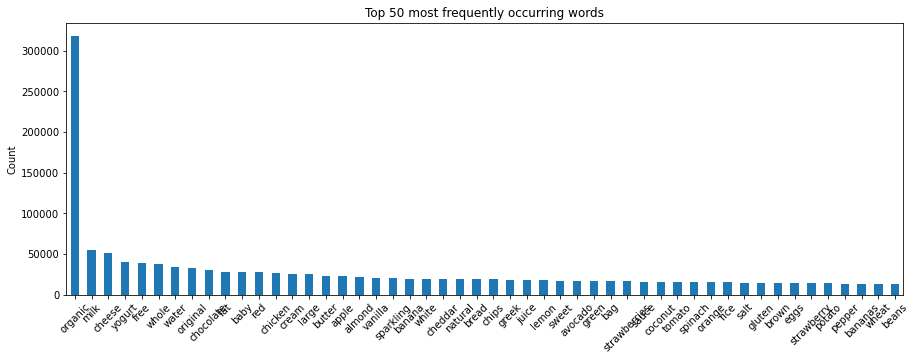

In [170]:
# create a visual with the most frequently occurred words

word_counts = pd.DataFrame(
    {"counts": product_transformed.toarray().sum(axis=0)},
    index=bagofwords.get_feature_names()
).sort_values("counts", ascending=False)

word_counts.head(50).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 50 most frequently occurring words")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

### Logisitc Regression Model

Run logistic regression model to identify healthy/unhealthy basket and find out words which predict healthy/unhealthy basket.

Scale the data first. I use 'with_mean=False' because I work with sparse matrice. 

In [171]:
from sklearn.preprocessing import StandardScaler

#Scale data
scaler = StandardScaler(with_mean=False)
scaler.fit(X_train_product_transformed)
X_train_ss = scaler.transform(X_train_product_transformed)
X_test_ss = scaler.transform(X_test_product_transformed)

In [172]:
from sklearn.linear_model import LogisticRegression

# Fitting a model with default hyperparameter
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_ss, y_train)

# Training and test score
print(f"Train score: {logreg.score(X_train_ss, y_train)}")
print(f"Test score: {logreg.score(X_test_ss, y_test)}")


Train score: 0.9150539707016191
Test score: 0.9070161912104857


#### Model evaluation

To evaluate my model I will plot the accuracy scores for both the train and test sets across different C values.

In [176]:
c_values = [0.01, 0.1, 1, 10, 100]
train1_scores_lr = []
validation_scores_lr = []


for c in c_values:
    # fit
    LR = LogisticRegression(C = c, max_iter=1000)
    LR.fit(X_train1, y_train1)
    
    # evaluate
    train1_scores_lr.append(LR.score(X_train1, y_train1))
    validation_scores_lr.append(LR.score(X_validation, y_validation))

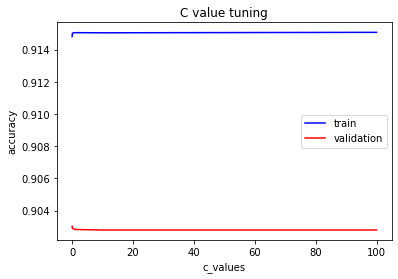

In [177]:
plt.figure()
plt.plot(c_values, train_scores_lr, c='blue', label='train')
plt.plot(c_values, validation_scores_lr, c='red', label='validation')
plt.xlabel('c_values')
plt.ylabel('accuracy')
plt.title('C value tuning')
plt.legend()
plt.show()

We can see that C value does not influence a lot on model performance. Model performance is high. So I will move forward with a default values.

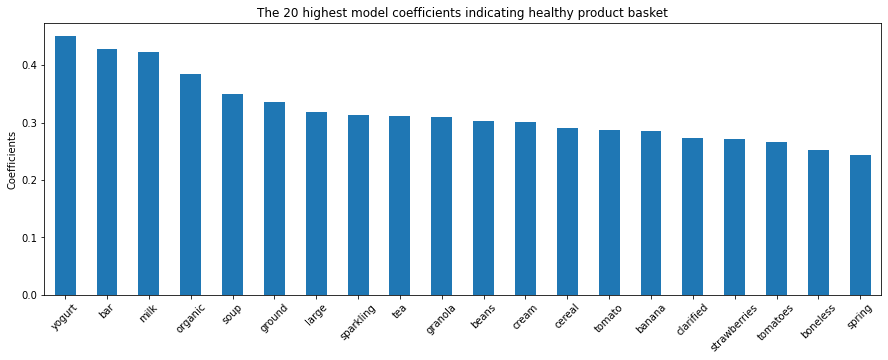

In [173]:
# plot coefficints indicated healthy product basket

word_counts = pd.DataFrame(
    {"coefficients": logreg.coef_[0]},
    index=bagofwords.get_feature_names()
).sort_values("coefficients", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("The 20 highest model coefficients indicating healthy product basket")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.show()

Words that predict healthy basket: yogurt, bar, milk, organic, soup, ground.

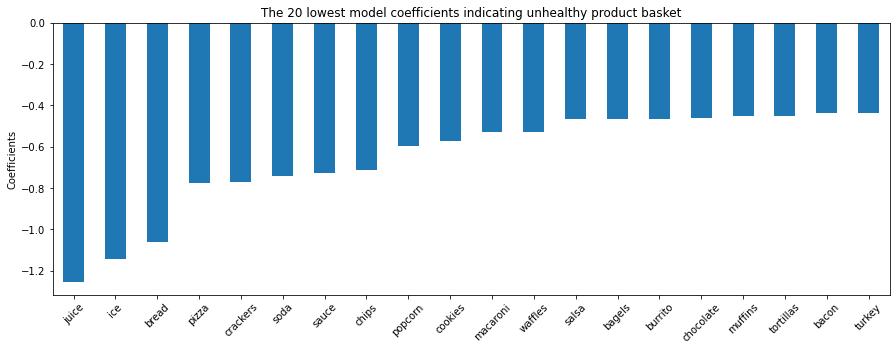

In [174]:
# plot coefficints indicated unhealthy product basket

word_counts.sort_values("coefficients", ascending=True).head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("The 20 lowest model coefficients indicating unhealthy product basket")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.show()

Words that predict healthy basket: juice, ice, bread, pizza, crackers, soda.

In [71]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get class predictions
y_pred = logreg_opt.predict(X_test_ss)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Predicted Unhealthy", "Predicted Healthy"],
    index=["True Unhealthy", "True Healthy"]
)

display(cf_df)

,Predicted Non-healthy,Predicted Healthy
True Non-healthy,14783,1321
True Healthy,1090,8746


We can see that the model correctly classified 14,783 baskets as unhealthy and 8,746 examples as healthy. However, it incorrectly classified 1,321 baskets as healthy when they were actually unhealthy, and 1,090 baskets as unhealthy when they were actually healthy.

In [74]:
# Precision 
from sklearn.metrics import precision_score

# precision_score(true labels, predicted labels)
precision_score(y_test, y_pred)

0.8687791794973676

In [75]:
# Recall
from sklearn.metrics import recall_score

# recall_score(true labels, predicted labels)
recall_score(y_test, y_pred)

0.8891825945506303

A precision of 0.86 means that out of all the positive predictions made by the model, 86% of them were actually true positives. In other words, when the model predicts a healthy baskets, it is correct 86% of the time. This indicates that the model has a relatively low false positive rate and is making accurate positive predictions.

A recall of 0.88 means that out of all the actual positive examples, the model correctly identified 88% of them as positive. In other words, the model is able to identify 88% of the healthy baskets in the dataset. This indicates that the model has a relatively low false negative rate and is able to capture most of the healthy baskets in the dataset.

## KNN Model

Lets build KNN as a one of the simple and ease to implement model.

In [225]:
# built KNN model on scaled data using default hyperparameters 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# instantiate
KNN_model = KNeighborsClassifier()

# fit
KNN_model.fit(X_train_product_transformed, y_train)

# score

train_predictions_KNN = KNN_model.predict(X_train_product_transformed)
train_accuracy_KNN = accuracy_score(train_predictions_KNN, y_train)
test_predictions_KNN = KNN_model.predict(X_test_product_transformed)
test_accuracy_KNN = accuracy_score(test_predictions_KNN, y_test)


print(f'Train set accuracy: {train_accuracy_KNN}')
print(f'Test set accuracy: {test_accuracy_KNN}')

Train set accuracy: 0.7329028527370856
Test set accuracy: 0.6696222050886661


KNN model explains 66% of dataset. 
There is a gap between the training and testing scores of a model indicates overfitting. To address this issue, we can fine-tune the hyperparameters to obtain more desirable results. This iterative process can help ensure that the model generalizes well to unseen data and performs optimally in real-world applications.

#### Model evaluation

Split data on training and validation sets.

In [209]:
# Splitting the train database in two chunks: train1 and validation set
X_train1, X_validation, y_train1, y_validation = \
    train_test_split(X_train_product_transformed, y_train, test_size = 0.3,
                     random_state=1)

In [210]:
# evaluate best K value 

k_values = range(10,100,40)
train1_scores_KNN = []
validation_scores_KNN = []


for k in k_values:
    # fit
    KNN = KNeighborsClassifier(n_neighbors = k)
    KNN.fit(X_train1, y_train1)
    
    # evaluate
    train1_scores_KNN.append(KNN.score(X_train1, y_train1))
    validation_scores_KNN.append(KNN.score(X_validation, y_validation))

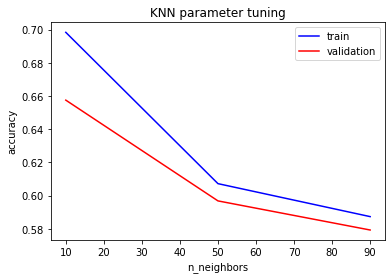

In [211]:
plt.figure()
plt.plot(k_values, train1_scores_KNN, c='blue', label='train')
plt.plot(k_values, validation_scores_KNN, c='red', label='validation')
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.title('KNN parameter tuning')
plt.legend()
plt.show()

Lest evaluate which normaliser and n_neighbors provide a better performance.

In [212]:
# apply Grid Search for hyperparameter tuning
estimators_KNN = [('normalise', StandardScaler(with_mean=False)),                  
                  ('KNN_model', KNeighborsClassifier())]

pipe_KNN = Pipeline(estimators_KNN)

param_grid_KNN = [{'normalise': [StandardScaler(with_mean=False), None],
                   'KNN_model': [KNeighborsClassifier()],
                   'KNN_model__n_neighbors': [10, 11, 12]}
]

grid_KNN = GridSearchCV(pipe_KNN, param_grid_KNN, cv=5)
fittedgrid_KNN = grid_KNN.fit(X_train_product_transformed, y_train)

In [188]:
# Best hyperparameters
fittedgrid_KNN.best_params_

{'KNN_model': KNeighborsClassifier(n_neighbors=12),
 'KNN_model__n_neighbors': 12,
 'normalise': None}

The KNN algorithm looks for the K closest points in the training dataset, based on a chosen distance metric (e.g. Euclidean distance), and takes the majority class of those K neighbors as the predicted class for the new data point. 
The optimum K value = 12. Lets build a new model.

#### New model with updated hyperparametres

In [213]:
# run updated version
# instantiate
KNN_model_opt = KNeighborsClassifier(n_neighbors=12)

# fit
KNN_model_opt.fit(X_train_product_transformed, y_train)

# score

train_predictions_KNN_opt = KNN_model_opt.predict(X_train_product_transformed)
train_accuracy_KNN_opt = accuracy_score(train_predictions_KNN_opt, y_train)
test_predictions_KNN_opt = KNN_model_opt.predict(X_test_product_transformed)
test_accuracy_KNN_opt = accuracy_score(test_predictions_KNN_opt, y_test)


print(f'Train set accuracy: {train_accuracy_KNN_opt}')
print(f'Test set accuracy: {test_accuracy_KNN_opt}')

Train set accuracy: 0.6926561295296839
Test set accuracy: 0.6639167309175019


The accuracy score of the test set has decreased from 0.669 to 0.663. However, the difference between the training and test scores is not significant, indicating that we have successfully addressed the issue of overfitting. By carefully balancing the complexity of the model with the size of the dataset, we have achieved a model that can generalize well to new data and is not overly dependent on the training set.

Create a confusion matrix to evaluate performance of optimized KNN model.

In [214]:
# Get class predictions
y_pred_KNN = KNN_model_opt.predict(X_test_product_transformed)

# Generate confusion matrix
cf_matrix_KNN = confusion_matrix(y_test, y_pred_KNN)

# label rows and columns
cf_df_KNN = pd.DataFrame(
    cf_matrix_KNN, 
    columns=["Predicted Non-healthy", "Predicted Healthy"],
    index=["True Non-healthy", "True Healthy"]
)

display(cf_df_KNN)

,Predicted Non-healthy,Predicted Healthy
True Non-healthy,7904,8200
True Healthy,518,9318


We can see that the model correctly classified 9,318 baskets as unhealthy and 7,904 examples as healthy. However, it incorrectly classified 8,200 baskets as healthy when they were actually unhealthy, and 518 baskets as unhealthy when they were actually healthy.

In [215]:
# Precision 
from sklearn.metrics import precision_score

# precision_score(true labels, predicted labels)
precision_score(y_test, y_pred_KNN)

0.5319100353921681

In [216]:
# Recall
from sklearn.metrics import recall_score

# recall_score(true labels, predicted labels)
recall_score(y_test, y_pred_KNN)

0.9473363155754372

A precision of 0.53 means that out of all the positive predictions made by the model, 53% of them were actually true positives. In other words, when the model predicts a healthy baskets, it is correct 53% of the time. This indicates that the model has a relatively low false positive rate and is making accurate positive predictions.

A recall of 0.94 means that out of all the actual positive examples, the model correctly identified 94% of them as positive. In other words, the model is able to identify 94% of the healthy baskets in the dataset. This indicates that the model has a relatively low false negative rate and is able to capture most of the healthy baskets in the dataset.

We can see that KNN model performe worse compare with logisitc regression.

## Decision Tree Model

In [217]:
from sklearn.tree import DecisionTreeClassifier

# instantiate
DT_model = DecisionTreeClassifier()


# fit
DT_model.fit(X_train_product_transformed, y_train)

# score
train_predictions_DT = DT_model.predict(X_train_product_transformed)
train_accuracy_DT = accuracy_score(train_predictions_DT, y_train)
test_predictions_DT = DT_model.predict(X_test_product_transformed)
test_accuracy_DT = accuracy_score(test_predictions_DT, y_test)


print(f'Train set accuracy: {train_accuracy_DT}')
print(f'Test set accuracy: {test_accuracy_DT}')

Train set accuracy: 0.9997397841171936
Test set accuracy: 0.7799151888974557


#### Model evaluation

In [218]:
max_depth = range(2,100,20)
train1_scores_DT = []
validation_scores_DT = []


for d in max_depth:
    # fit
    DT = DecisionTreeClassifier(max_depth = d)
    DT.fit(X_train1, y_train1)
    
    # evaluate
    train1_scores_DT.append(DT.score(X_train1, y_train1))
    validation_scores_DT.append(DT.score(X_validation, y_validation))

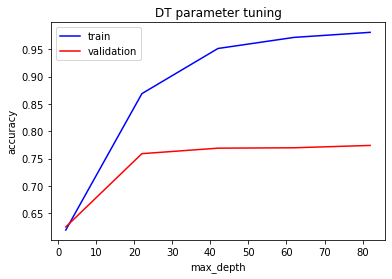

In [219]:
plt.figure()
plt.plot(max_depth, train1_scores_DT, c='blue', label='train')
plt.plot(max_depth, validation_scores_DT, c='red', label='validation')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title('DT parameter tuning')
plt.legend()
plt.show()

In [221]:
estimators = [('normalise', StandardScaler(with_mean=False)),             
              ('DT_model', DecisionTreeClassifier())]

pipe_DT = Pipeline(estimators)

param_grid_DT = [{'normalise': [StandardScaler(with_mean=False), None],
                  'DT_model': [DecisionTreeClassifier()],
                  'DT_model__max_depth': [40, 45,47]}
                 
]

grid_DT = GridSearchCV(pipe_DT, param_grid_DT, cv=3)
fittedgrid_DT = grid_DT.fit(X_train_product_transformed, y_train)

In [222]:
# Best hyperparameters
fittedgrid_DT.best_params_

{'DT_model': DecisionTreeClassifier(max_depth=47),
 'DT_model__max_depth': 47,
 'normalise': StandardScaler(with_mean=False)}

In [223]:
# instantiate
DT_model_opt = DecisionTreeClassifier(max_depth=47)


# fit
DT_model_opt.fit(X_train_ss, y_train)

# score
train_predictions_opt = DT_model_opt.predict(X_train_ss)
train_accuracy_opt = accuracy_score(train_predictions_opt, y_train)
test_predictions_opt = DT_model_opt.predict(X_test_ss)
test_accuracy_opt = accuracy_score(test_predictions_opt, y_test)
print(f'Train set accuracy: {train_accuracy_opt}')
print(f'Test set accuracy: {test_accuracy_opt}')

Train set accuracy: 0.956360832690825
Test set accuracy: 0.7706630686198921


With model evaluation we decreased accuracy score and could not avoid overfitting. So, decision tree model did not perform well on the dataset.

To sum up, our analysis suggests that the logistic regression model outperforms the KNN and decision tree models in terms of predictive accuracy and overfitting. Although the KNN model yields lower performance compared to the logistic regression model, it does not exhibit any signs of overfitting. On the other hand, the decision tree model appears to be overfitted, which could compromise its ability to generalize well to new data. Overall, our findings highlight the importance of selecting the appropriate model for the task at hand, and considering factors such as performance and overfitting when making such choices.